<a href="https://colab.research.google.com/github/anilmaddu/Daily-Neural-Network-Practice-2/blob/master/cfpbregz_entity_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pdfminer.six spacy networkx matplotlib
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install requests

import re
import spacy
import networkx as nx
from pdfminer.high_level import extract_text
from pdfminer.pdfparser import PSEOF
import requests

# Load Spacy model for NLP tasks
nlp = spacy.load("en_core_web_sm")

# Function to extract text from a PDF file
def extract_pdf_text(pdf_path):
  try:
    return extract_text(pdf_path)
  except PSEOF:
    print(f"Error: Unable to extract text from {pdf_path}. The file may be corrupted or incomplete.")
    return "" # Return an empty string if extraction fails
# return extract_text(pdf_path)


# Function to extract key entities and summarize text using Spacy
def extract_entities_and_summary(text):
    doc = nlp(text)
    # Convert the list of tuples to a string representation
    entities = str([(ent.text, ent.label_) for ent in doc.ents])
    sentences = list(doc.sents)
    summary = sentences[0].text if sentences else ""
    return entities, summary



# Function to parse the CFPB regulations PDF and extract information
def parse_cfpb_regulations(pdf_path):
    text = extract_pdf_text(pdf_path)
    sections = re.split(r'\n\s*\d+\.\s', text)  # Simple regex to split sections, adjust as necessary
    regulations = {}
    for section in sections:
        if section.strip():
            section_title = section.split('\n')[0]
            entities, summary = extract_entities_and_summary(section)
            regulations[section_title] = {
                'text': section,
                'entities': entities, # Now a string representation of the list of tuples
                'summary': summary
            }
    return regulations

# Function to add nodes and edges to the graph
def add_to_graph(graph, regulation_section, regulation_data, parent=None):
    # Sanitize text data for XML compatibility
    # Use a more robust sanitization method to remove invalid XML characters
    def sanitize_for_xml(text):
        return ''.join(c for c in text if ord(c) < 128 and c.isprintable())  

    sanitized_text = sanitize_for_xml(regulation_data['text'])
    sanitized_entities = sanitize_for_xml(regulation_data['entities'])
    sanitized_summary = sanitize_for_xml(regulation_data['summary'])

    graph.add_node(regulation_section, text=sanitized_text, entities=sanitized_entities, summary=sanitized_summary)
    if parent:
        graph.add_edge(parent, regulation_section)

# Function to build the graph from parsed regulations
def build_graph(graph, regulations, parent=None):
    for section, content in regulations.items():
        add_to_graph(graph, section, content, parent)

# Main function to execute the parsing and graph building
def main(pdf_path):
    # response = requests.get(pdf_path)
    # local_pdf_path = "temp.pdf"  # Temporary local file name
    # with open(local_pdf_path, "wb") as f:
        # f.write(response.content)
    G = nx.DiGraph()
    regulations = parse_cfpb_regulations(pdf_path)
    build_graph(G, regulations)

    print("Nodes:")
    print(G.nodes(data=True))
    print("\nEdges:")
    print(G.edges())

    # Save the graph to a file for visualization
    nx.write_graphml(G, "cfpb_credit_card_regulations.graphml")



    # To visualize the graph
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
    plt.title("CFPB Credit Card Regulations Knowledge Graph")
    plt.show()


# Example usage
# pdf_path='https://www.govinfo.gov/content/pkg/CFR-2023-title12-vol9/pdf/CFR-2023-title12-vol9-part1026.pdf''
pdf_path = '/content/CFR-2023-title12-vol9-part1026.pdf'
main(pdf_path)


Nodes:
[('PART 1026—TRUTH IN LENDING ', {'text': 'PART 1026TRUTH IN LENDING (REGULATION Z) Subpart AGeneral Sec. 1026.1 Authority,  purpose,  coverage,  organi-zation, enforcement, and liability. 1026.2 Definitions and rules of construction. 1026.3 Exempt transactions. 1026.4 Finance charge. Subpart BOpen-End Credit 1026.5 General disclosure requirements. 1026.6 Account-opening disclosures. 1026.7 Periodic statement. 1026.8Identifying  transactions  on  periodic statements. 1026.9 Subsequent disclosure requirements. 1026.10 Payments. 1026.11 Treatment  of  credit  balances;  ac-count termination. 1026.12 Special credit card provisions. 1026.13 Billing error resolution. 1026.14 Determination  of  annual  percentage rate. 1026.15 Right of rescission. 1026.16 Advertising. Subpart CClosed-End Credit 1026.17 General disclosure requirements. 1026.18 Content of disclosures. 1026.19 Certain  mortgage  and  variable-rate transactions. 1026.20 Disclosure  requirements  regarding post-consummatio

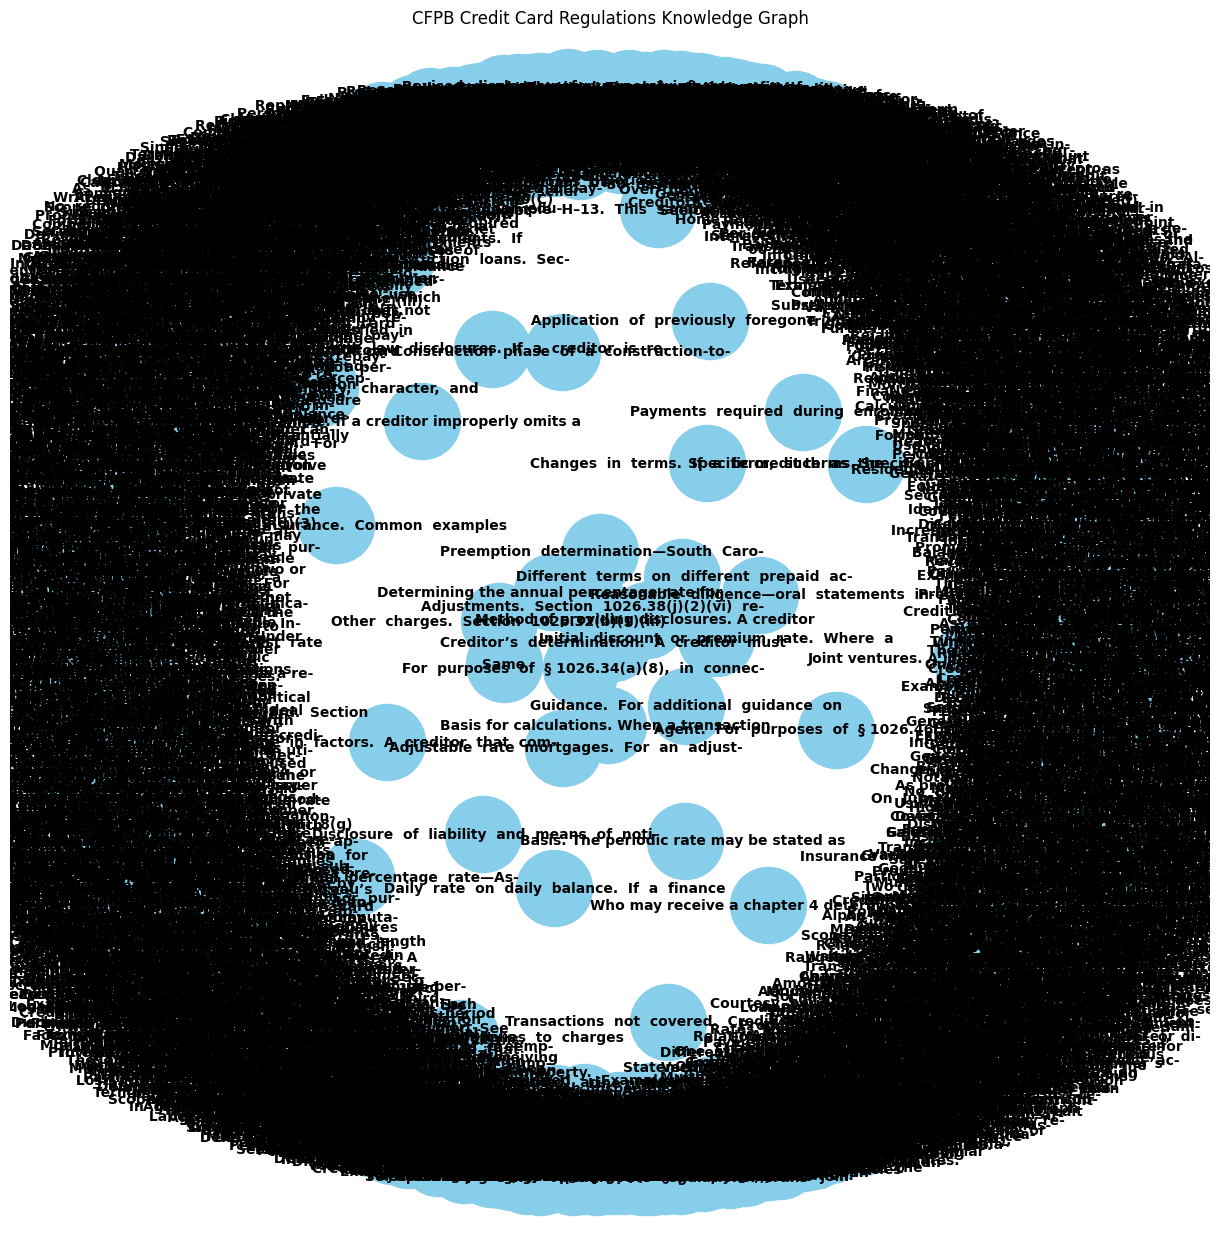

In [ ]:
import re
import spacy
import networkx as nx
from pdfminer.high_level import extract_text
from pdfminer.pdfparser import PSEOF
import requests

# Load Spacy model for NLP tasks
nlp = spacy.load("en_core_web_sm")

# Function to extract text from a PDF file
def extract_pdf_text(pdf_path):
  try:
    return extract_text(pdf_path)
  except PSEOF:
    print(f"Error: Unable to extract text from {pdf_path}. The file may be corrupted or incomplete.")
    return "" # Return an empty string if extraction fails
# return extract_text(pdf_path)


# Function to extract key entities and summarize text using Spacy
def extract_entities_and_summary(text):
    doc = nlp(text)
    # Convert the list of tuples to a string representation
    entities = str([(ent.text, ent.label_) for ent in doc.ents])
    sentences = list(doc.sents)
    summary = sentences[0].text if sentences else ""
    return entities, summary



# Function to parse the CFPB regulations PDF and extract information
def parse_cfpb_regulations(pdf_path):
    text = extract_pdf_text(pdf_path)
    sections = re.split(r'\n\s*\d+\.\s', text)  # Simple regex to split sections, adjust as necessary
    regulations = {}
    for section in sections:
        if section.strip():
            section_title = section.split('\n')[0]
            entities, summary = extract_entities_and_summary(section)
            regulations[section_title] = {
                'text': section,
                'entities': entities, # Now a string representation of the list of tuples
                'summary': summary
            }
    return regulations

# Function to add nodes and edges to the graph
def add_to_graph(graph, regulation_section, regulation_data, parent=None):
    # Sanitize text data for XML compatibility
    # Use a more robust sanitization method to remove invalid XML characters
    def sanitize_for_xml(text):
        return ''.join(c for c in text if ord(c) < 128 and c.isprintable())

    sanitized_text = sanitize_for_xml(regulation_data['text'])
    sanitized_entities = sanitize_for_xml(regulation_data['entities'])
    sanitized_summary = sanitize_for_xml(regulation_data['summary'])

    graph.add_node(regulation_section, text=sanitized_text, entities=sanitized_entities, summary=sanitized_summary)
    if parent:
        graph.add_edge(parent, regulation_section)

# Function to build the graph from parsed regulations
def build_graph(graph, regulations, parent=None):
    for section, content in regulations.items():
        add_to_graph(graph, section, content, parent)

# Main function to execute the parsing and graph building
def main(pdf_path):
    # response = requests.get(pdf_path)
    # local_pdf_path = "temp.pdf"  # Temporary local file name
    # with open(local_pdf_path, "wb") as f:
        # f.write(response.content)
    G = nx.DiGraph()
    regulations = parse_cfpb_regulations(pdf_path)
    build_graph(G, regulations)

    print("Nodes:")
    print(G.nodes(data=True))
    print("\nEdges:")
    print(G.edges())

    # Save the graph to a file for visualization
    nx.write_graphml(G, "cfpb_credit_card_regulations.graphml")



    # To visualize the graph
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
    plt.title("CFPB Credit Card Regulations Knowledge Graph")
    plt.show()


# Example usage
# pdf_path='https://www.govinfo.gov/content/pkg/CFR-2023-title12-vol9/pdf/CFR-2023-title12-vol9-part1026.pdf''
pdf_path = '/content/CFR-2023-title12-vol9-part1026.pdf'
main(pdf_path)


In [ ]:
import networkx as nx

# Function to add nodes and edges to the graph
def add_to_graph(graph, regulation_section, regulation_text, parent=None):
    graph.add_node(regulation_section, text=regulation_text)
    if parent:
        graph.add_edge(parent, regulation_section)

# Create a new directed graph
G = nx.DiGraph()

# Example data from CFPB regulations for credit cards
# In practice, this data should be parsed from the actual CFPB regulations document
regulations = {
    'Regulation Z': {
        'Subpart A - General': {
            '1026.1 - Authority, purpose, coverage, organization, enforcement, and liability': 'Regulation text for 1026.1',
            '1026.2 - Definitions and rules of construction': 'Regulation text for 1026.2',
        },
        'Subpart B - Open-End Credit': {
            '1026.5 - General disclosure requirements': 'Regulation text for 1026.5',
            '1026.6 - Account-opening disclosures': 'Regulation text for 1026.6',
        },
    },
    'Truth in Lending Act': {
        'Section 102 - General Disclosures': 'Regulation text for Section 102',
        'Section 103 - Specific Disclosures': {
            '103(a) - Disclosure of fees': 'Regulation text for 103(a)',
            '103(b) - Disclosure of interest rates': 'Regulation text for 103(b)',
        },
    },
}

# Recursively add nodes and edges to the graph
def build_graph(graph, regulations, parent=None):
    for section, content in regulations.items():
        if isinstance(content, dict):
            add_to_graph(graph, section, '', parent)
            build_graph(graph, content, section)
        else:
            add_to_graph(graph, section, content, parent)

# Build the graph from the regulations data
build_graph(G, regulations)

# Output the graph nodes and edges
print("Nodes:")
print(G.nodes(data=True))
print("\nEdges:")
print(G.edges())

# Save the graph to a file for visualization
nx.write_graphml(G, "cfpb_credit_card_regulations.graphml")

# To visualize the graph, you can use tools like Gephi, Cytoscape, or NetworkX's built-in drawing functions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("CFPB Credit Card Regulations Knowledge Graph")
plt.show()